<a href="https://colab.research.google.com/github/annuhsans/Schooled-/blob/main/Play_Tennis_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.tree import export_text
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
data = pd.read_csv('/content/dataset.csv')
print(data)
print(type(data))

    Day   Outlook  Temp   Humid    Wind PlayTennis
0    d7  Overcast  Cool  Normal  Strong        Yes
1    d3  Overcast   Hot    High    Weak        Yes
2   d13  Overcast   Hot  Normal    Weak        Yes
3   d12  Overcast  Mild    High  Strong        Yes
4    d6     Rainy  Cool  Normal  Strong         No
5    d5     Rainy  Cool  Normal    Weak        Yes
6   d14     Rainy  Mild    High  Strong         No
7    d4     Rainy  Mild    High    Weak        Yes
8   d10     Rainy  Mild  Normal    Weak        Yes
9    d9     Sunny  Cool  Normal    Weak        Yes
10   d2     Sunny   Hot    High  Strong         No
11   d1     Sunny   Hot    High    Weak         No
12  d11     Sunny  Mild    High  Strong        Yes
13   d8     Sunny  Mild    High    Weak         No
<class 'pandas.core.frame.DataFrame'>


In [ ]:
print(dir(data))

['Day', 'Humid', 'Outlook', 'PlayTennis', 'T', 'Temp', 'Wind', '_AXIS_LEN', '_AXIS_ORDERS', '_AXIS_TO_AXIS_NUMBER', '_HANDLED_TYPES', '__abs__', '__add__', '__and__', '__annotations__', '__array__', '__array_priority__', '__array_ufunc__', '__array_wrap__', '__bool__', '__class__', '__contains__', '__copy__', '__dataframe__', '__deepcopy__', '__delattr__', '__delitem__', '__dict__', '__dir__', '__divmod__', '__doc__', '__eq__', '__finalize__', '__floordiv__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__imod__', '__imul__', '__init__', '__init_subclass__', '__invert__', '__ior__', '__ipow__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lt__', '__matmul__', '__mod__', '__module__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr

In [ ]:
# Load the dataset
data = pd.read_csv('/content/dataset.csv')
print(data)
data = data.drop(['Day'], axis=1)
print(data)

    Day   Outlook  Temp   Humid    Wind PlayTennis
0    d7  Overcast  Cool  Normal  Strong        Yes
1    d3  Overcast   Hot    High    Weak        Yes
2   d13  Overcast   Hot  Normal    Weak        Yes
3   d12  Overcast  Mild    High  Strong        Yes
4    d6     Rainy  Cool  Normal  Strong         No
5    d5     Rainy  Cool  Normal    Weak        Yes
6   d14     Rainy  Mild    High  Strong         No
7    d4     Rainy  Mild    High    Weak        Yes
8   d10     Rainy  Mild  Normal    Weak        Yes
9    d9     Sunny  Cool  Normal    Weak        Yes
10   d2     Sunny   Hot    High  Strong         No
11   d1     Sunny   Hot    High    Weak         No
12  d11     Sunny  Mild    High  Strong        Yes
13   d8     Sunny  Mild    High    Weak         No
     Outlook  Temp   Humid    Wind PlayTennis
0   Overcast  Cool  Normal  Strong        Yes
1   Overcast   Hot    High    Weak        Yes
2   Overcast   Hot  Normal    Weak        Yes
3   Overcast  Mild    High  Strong        Yes
4    

In [ ]:
# Encode categorical features (Outlook, Temp, Humid, Wind) into numericals
label_encoders = {}
for column in data.columns[:-1]:  # Exclude the target column
    ie = preprocessing.LabelEncoder()
    data[column] = ie.fit_transform(data[column])
    label_encoders[column] = ie
print(data)


    Outlook  Temp  Humid  Wind PlayTennis
0         0     0      1     0        Yes
1         0     1      0     1        Yes
2         0     1      1     1        Yes
3         0     2      0     0        Yes
4         1     0      1     0         No
5         1     0      1     1        Yes
6         1     2      0     0         No
7         1     2      0     1        Yes
8         1     2      1     1        Yes
9         2     0      1     1        Yes
10        2     1      0     0         No
11        2     1      0     1         No
12        2     2      0     0        Yes
13        2     2      0     1         No


In [ ]:
# Split the dataset into features and target
X = data.drop(columns=['PlayTennis'])
y = data['PlayTennis']

In [ ]:
import sklearn.model_selection as sk_model_selection
X_train, X_test, y_train, y_test = sk_model_selection.train_test_split(X, y, test_size=0.20, random_state=123)
print(X_train)
print(y_train)

    Outlook  Temp  Humid  Wind
0         0     0      1     0
5         1     0      1     1
9         2     0      1     1
8         1     2      1     1
11        2     1      0     1
3         0     2      0     0
1         0     1      0     1
6         1     2      0     0
12        2     2      0     0
2         0     1      1     1
13        2     2      0     1
0     Yes
5     Yes
9     Yes
8     Yes
11     No
3     Yes
1     Yes
6      No
12    Yes
2     Yes
13     No
Name: PlayTennis, dtype: object


In [ ]:
# Create a decision tree classifier
clf = DecisionTreeClassifier(criterion='entropy')

# Fit the classifier to the data
clf.fit(X, y)


# Print the decision tree rules
tree_rules = export_text(clf, feature_names=X.columns.tolist())
print("Decision Tree Rules:")
print(tree_rules)

Decision Tree Rules:
|--- Outlook <= 0.50
|   |--- class: Yes
|--- Outlook >  0.50
|   |--- Humid <= 0.50
|   |   |--- Temp <= 1.50
|   |   |   |--- class: No
|   |   |--- Temp >  1.50
|   |   |   |--- Wind <= 0.50
|   |   |   |   |--- Outlook <= 1.50
|   |   |   |   |   |--- class: No
|   |   |   |   |--- Outlook >  1.50
|   |   |   |   |   |--- class: Yes
|   |   |   |--- Wind >  0.50
|   |   |   |   |--- Outlook <= 1.50
|   |   |   |   |   |--- class: Yes
|   |   |   |   |--- Outlook >  1.50
|   |   |   |   |   |--- class: No
|   |--- Humid >  0.50
|   |   |--- Wind <= 0.50
|   |   |   |--- class: No
|   |   |--- Wind >  0.50
|   |   |   |--- class: Yes



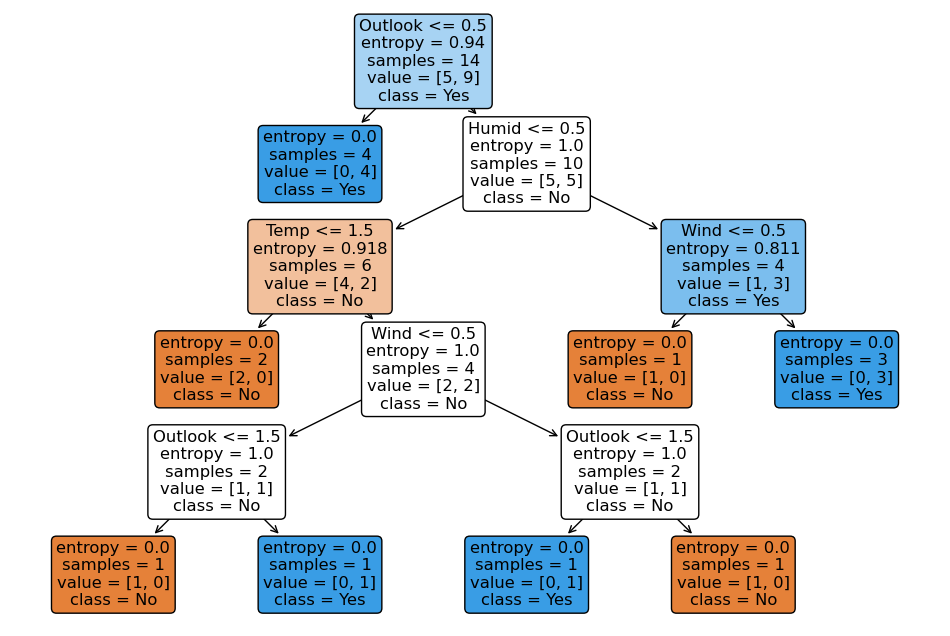

In [ ]:
# Plot the decision tree
plt.figure(figsize=(12, 8))
from sklearn.tree import plot_tree
plot_tree(clf, feature_names=X.columns.tolist(), class_names=['No', 'Yes'], filled=True, rounded=True)
plt.show()
